### Connect to Drive

In [1]:
#from google.colab import drive
#drive.mount('/gdrive')

In [2]:
#%cd /gdrive/My Drive/ANN Exercises/Homework1

### Import libraries

In [3]:
import tensorflow as tf
import numpy as np
import os
import random
import math 
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix

tfk = tf.keras
tfkl = tf.keras.layers
print(tf.__version__)

2.6.4


In [4]:
# Import dataset
#!unzip training_dataset_homework1.zip

# Dataset folders 
dataset_dir = '../input/homework1/training_data_final'

In [5]:
# Random seed for reproducibility
seed = 1337

random.seed(seed)
np.random.seed(seed)
tf.random.set_seed(seed)
os.environ['PYTHONHASHSEED'] = str(seed)
tf.compat.v1.set_random_seed(seed)

In [6]:
labels = ['Species1', # 1
          'Species2', # 2
          'Species3', # 3
          'Species4', # 4
          'Species5', # 5
          'Species6', # 6
          'Species7', # 7
          'Species8', # 8
]

In [7]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Create an instance of ImageDataGenerator for training, validation, and test sets
o_train_data_gen = ImageDataGenerator(
 
)

# Obtain a data generator with the 'ImageDataGenerator.flow_from_directory' method
o_train_gen = o_train_data_gen.flow_from_directory(directory=dataset_dir,
                                               target_size=(96,96),
                                               color_mode='rgb',
                                               classes=labels, # can be set to labels
                                               subset="training",
                                               class_mode='categorical',
                                               batch_size=32,
                                               shuffle=False,
                                               seed=seed)


Found 3542 images belonging to 8 classes.


In [8]:
train_gen = tf.keras.utils.image_dataset_from_directory(
    directory=dataset_dir,
    class_names=labels,
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(96,96),
    shuffle=True,
    seed=seed,
    interpolation='nearest',
    validation_split=0.15,
    subset='training'
)

valid_gen = tf.keras.utils.image_dataset_from_directory(
    directory=dataset_dir,
    class_names=labels,
    label_mode='categorical',
    color_mode='rgb',
    batch_size=32,
    image_size=(96,96),
    shuffle=True,
    seed=seed,
    interpolation='nearest',
    validation_split=0.15,
    subset='validation'
)

tg = list(train_gen.unbatch().map(lambda x, y: (x, y)))
vg = list(valid_gen.unbatch().map(lambda x, y: (x, y)))

x_train = np.asarray(list(map(lambda t: t[0], tg)))
y_train = np.asarray(list(map(lambda t: t[1], tg)))

x_val = np.asarray(list(map(lambda t: t[0], vg)))
y_val = np.asarray(list(map(lambda t: t[1],vg)))

Found 3542 files belonging to 8 classes.
Using 3011 files for training.


2022-11-17 10:21:44.100645: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-17 10:21:44.195456: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-17 10:21:44.196225: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-11-17 10:21:44.199449: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

Found 3542 files belonging to 8 classes.
Using 531 files for validation.


2022-11-17 10:21:47.139787: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


In [9]:
x_train = np.asarray(list(map(lambda t: t[0], tg)))
#print(x_train)
print("-------------------")
x_train = np.asarray(list(map(lambda t: t[0], tg)))
#print(x_train)

-------------------


array([0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

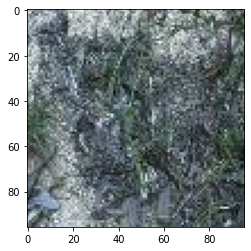

In [10]:
#print(x_train[0])
#print("----")
#print(o_valid_gen[0][0][0])
#print(np.shape(x_train[0]))
#print(np.shape(o_valid_gen[0][0][0]))
plt.imshow(np.uint8(x_val[25]))
y_train[100]

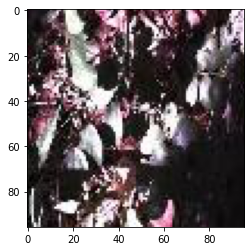

In [11]:
plt.imshow(np.uint8(o_train_gen[0][0][25]))

In [12]:
norm_layer = tfkl.Normalization()
norm_layer.adapt(x_train)

preproc_model = tfk.Sequential()
preproc_model.add(tfkl.Input(shape=(96, 96, 3)))
preproc_model.add(norm_layer)
preproc_model.add(tf.keras.layers.Rescaling(1./255))

In [13]:
keep = x_train
x_train = np.squeeze([preproc_model(i, training=True) for i in x_train])
x_val = np.squeeze([preproc_model(i, training=True) for i in x_val])

print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_val))
print(np.shape(y_val))

(3011, 96, 96, 3)
(3011, 8)
(531, 96, 96, 3)
(531, 8)


In [14]:
#n = 0
#mean = 0
#for k in range(0, 3011):
#    for i in range(0, 93):
#        for j in range(0, 93):
#            n = n+1
#            mean = mean + keep[k][i][j][0]
#mean = mean/n

In [15]:
#variance = 0
#for k in range(0, 3011):
#    for i in range(0, 93):
#        for j in range(0, 93):
#            variance = variance + (keep[k][i][j][0] - mean) ** 2
#variance = variance/n

In [34]:
#print(f"My mean: {mean}; My variance: {variance}")
print(f"Norm mean: {norm_layer.mean}; Norm variance: {norm_layer.variance}")
#print((x_train[0][0][0][0]*math.sqrt(variance))+mean)

Norm mean: [[[[87.67739  95.358444 88.99623 ]]]]; Norm variance: [[[[2974.4536 3029.7087 2898.6418]]]]


### Models metadata

In [29]:
input_shape = (96, 96, 3)
epochs = 600
batch_size = 16

### CNN model

In [30]:
inputs = tfk.Input(shape=input_shape)
x = tfkl.Conv2D(
    filters = 32,
    kernel_size = (3,3),
    activation = 'relu',
    name = 'conv1'
)(inputs)
x = tfkl.MaxPooling2D(name='pool1')(x)

x = tfkl.Conv2D(
    filters = 64,
    kernel_size = (3,3),
    activation = 'relu',
    name = 'conv2'
)(x)
x = tfkl.MaxPooling2D(name='pool2')(x)

x = tfkl.Conv2D(
    filters = 128,
    kernel_size = (3,3),
    activation = 'relu',
    name = 'conv3'
)(x)

x = tfkl.GlobalAveragePooling2D(name='gpooling')(x)


x = tfkl.Dropout(.2, seed=seed, name='dropout1')(x)
x = tfkl.Dense(
    128,
    activation='relu', 
    name='classifier1'
)(x)
x = tfkl.Dropout(.2, seed=seed, name='dropout2')(x)
x = tfkl.Dense(
    64, 
    activation='relu', 
    name='classifier2'
)(x)
x = tfkl.Dropout(.2, seed=seed, name='dropout3')(x)
outputs = tfkl.Dense(
    8, 
    activation='softmax',
    kernel_initializer = tfk.initializers.GlorotUniform(seed))(x)


# Connect input and output through the Model class
tl_model = tfk.Model(inputs=inputs, outputs=outputs, name='model')

# Compile the model
tl_model.compile(loss=tfk.losses.CategoricalCrossentropy(), optimizer=tfk.optimizers.Adam(), metrics='accuracy')

tl_model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         [(None, 96, 96, 3)]       0         
_________________________________________________________________
conv1 (Conv2D)               (None, 94, 94, 32)        896       
_________________________________________________________________
pool1 (MaxPooling2D)         (None, 47, 47, 32)        0         
_________________________________________________________________
conv2 (Conv2D)               (None, 45, 45, 64)        18496     
_________________________________________________________________
pool2 (MaxPooling2D)         (None, 22, 22, 64)        0         
_________________________________________________________________
conv3 (Conv2D)               (None, 20, 20, 128)       73856     
_________________________________________________________________
gpooling (GlobalAveragePooli (None, 128)               0     

In [19]:
print(type(np.asarray(x_train)))

<class 'numpy.ndarray'>


In [31]:
print(np.shape(x_train))
#print((x_train))
print(np.shape(y_train))

# Train the model
#history = tl_model.fit(
#    x = o_train_gen, 
#    validation_data = o_valid_gen,
#    #batch_size=batch_size,
#    epochs = epochs,
#    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=20, restore_best_weights=True)],
#).history

# Train the model
history = tl_model.fit(
    x = x_train, 
    y = y_train,
    validation_data = (x_val, y_val),
    batch_size=batch_size,
    epochs = epochs,
    callbacks = [tfk.callbacks.EarlyStopping(monitor='val_accuracy', mode='max', patience=60, restore_best_weights=True)],
).history

(3011, 96, 96, 3)
(3011, 8)
Epoch 1/600
189/189 [==============================] - 2s 7ms/step - loss: 2.0425 - accuracy: 0.1455 - val_loss: 2.0318 - val_accuracy: 0.1337
Epoch 2/600
189/189 [==============================] - 1s 6ms/step - loss: 2.0281 - accuracy: 0.1528 - val_loss: 2.0206 - val_accuracy: 0.1469
Epoch 3/600
189/189 [==============================] - 1s 6ms/step - loss: 2.0273 - accuracy: 0.1431 - val_loss: 2.0169 - val_accuracy: 0.1431
Epoch 4/600
189/189 [==============================] - 1s 6ms/step - loss: 1.9010 - accuracy: 0.2331 - val_loss: 1.7061 - val_accuracy: 0.2806
Epoch 5/600
189/189 [==============================] - 1s 6ms/step - loss: 1.7477 - accuracy: 0.2776 - val_loss: 1.7599 - val_accuracy: 0.2768
Epoch 6/600
189/189 [==============================] - 1s 6ms/step - loss: 1.7201 - accuracy: 0.2903 - val_loss: 1.6545 - val_accuracy: 0.2674
Epoch 7/600
189/189 [==============================] - 1s 6ms/step - loss: 1.6985 - accuracy: 0.3012 - val_loss: 1

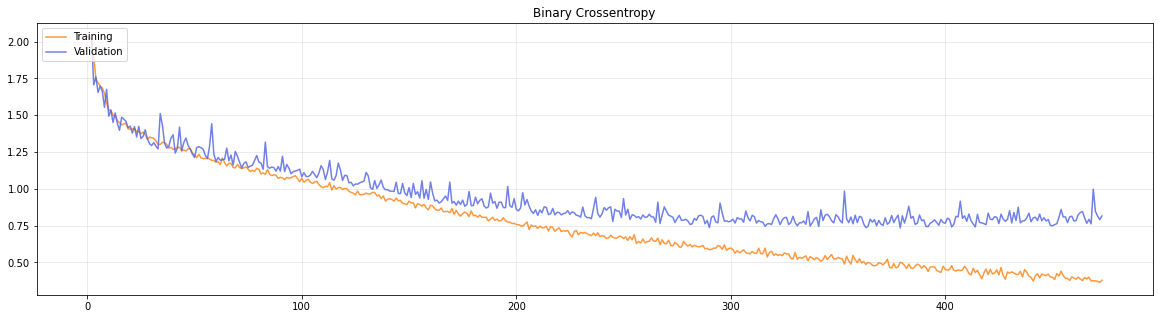

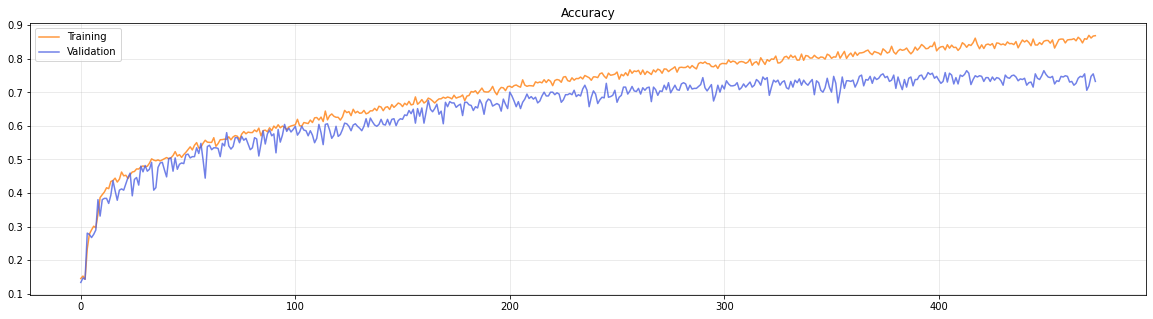

In [32]:
# Plot the training
plt.figure(figsize=(20,5))
plt.plot(history['loss'], label='Training', alpha=.8, color='#ff7f0e')
plt.plot(history['val_loss'], label='Validation', alpha=.8, color='#4D61E2')
plt.legend(loc='upper left')
plt.title('Binary Crossentropy')
plt.grid(alpha=.3)

plt.figure(figsize=(20,5))
plt.plot(history['accuracy'], label='Training', alpha=.8, color='#ff7f0e')
plt.plot(history['val_accuracy'], label='Validation', alpha=.8, color='#4D61E2')
plt.legend(loc='upper left')
plt.title('Accuracy')
plt.grid(alpha=.3)

plt.show()

In [22]:
tl_model.save('ANN_Homework1_Model')

2022-11-17 10:26:26.039784: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


In [23]:
import shutil
shutil.make_archive("ANN_Homework1_Model", 'zip', '/kaggle/working/ANN_Homework1_Model')

'/kaggle/working/ANN_Homework1_Model.zip'